In [676]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

### data cleaning

In [678]:
data = pd.read_csv("Downloads/1.04.+Real-life+example.csv")
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [679]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [680]:
data.nunique()

Brand             7
Price           906
Body              6
Mileage         410
EngineV          73
Engine Type       4
Registration      2
Year             39
Model           312
dtype: int64

In [681]:
df=data.drop(['Model'],axis=1)

In [682]:
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014


In [683]:
df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [684]:
data_no_mv = df.dropna(subset=['Price','EngineV'])
data_no_mv

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


In [685]:
q=data_no_mv['Price'].quantile(0.99)

In [686]:
q

129812.51999999981

In [687]:
data_filtered = data_no_mv['Price']<q

In [688]:
data_1 = data_no_mv[data_filtered]

In [689]:
data_1.describe()

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


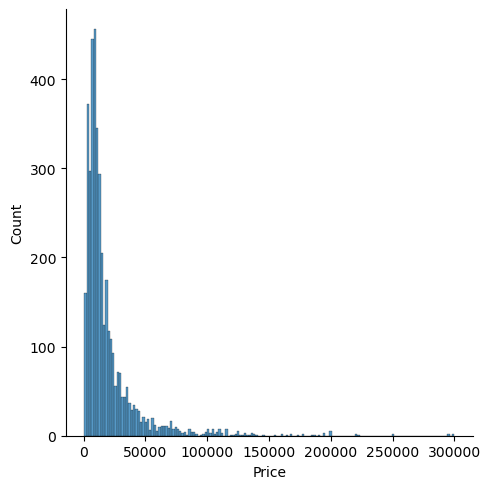

In [690]:
sns.displot(data_no_mv['Price'])

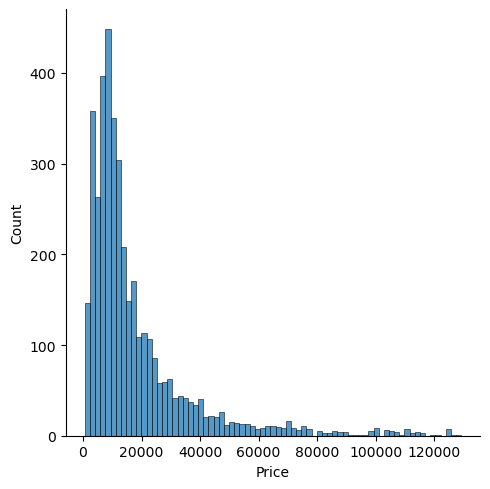

In [691]:
sns.displot(data_1['Price'])

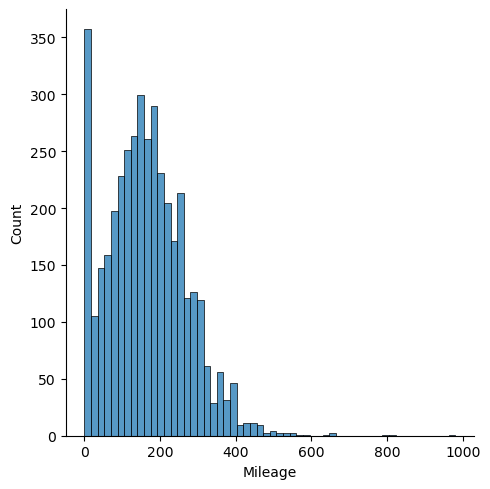

In [692]:
sns.displot(data_no_mv['Mileage'])

In [693]:
q=data_1['Mileage'].quantile(0.99)

In [694]:
q

435.5100000000002

In [695]:
data_2=data_1[data_1['Mileage']<q]

In [696]:
data_2.describe()

,Price,Mileage,EngineV,Year
count,3944.000000,3944.000000,3944.000000,3944.000000
mean,17933.880822,161.484026,2.747612,2006.389959
std,19008.212025,96.027108,4.980406,6.595986
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21376.250000,230.000000,3.000000,2011.000000
max,129222.000000,435.000000,99.990000,2016.000000


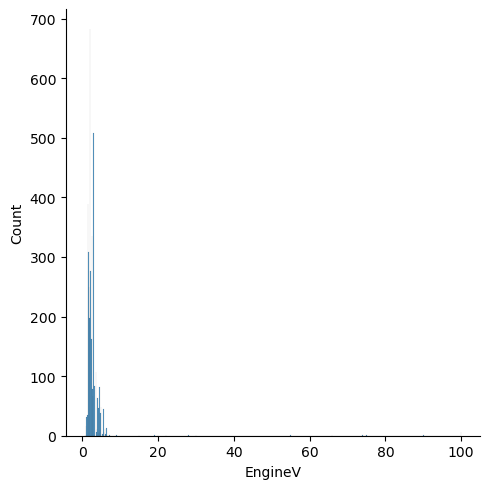

In [697]:
sns.displot(data_2['EngineV'])

In [698]:
data_3= data_2[data_2['EngineV']<6.6]

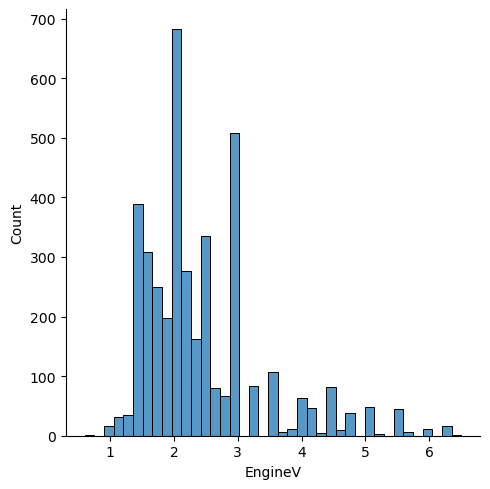

In [699]:
sns.displot(data_3['EngineV'])

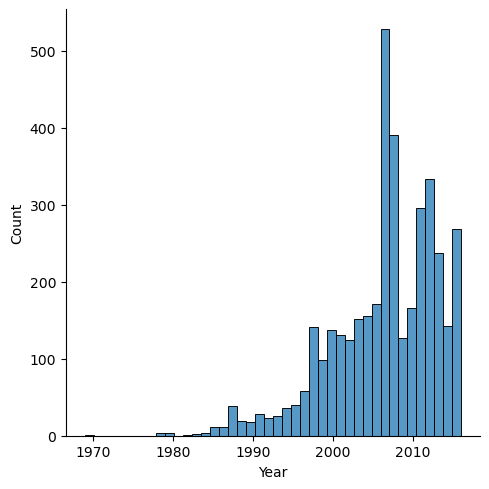

In [700]:
sns.displot(data_3['Year'])

In [701]:
q = data_3['Year'].quantile(0.01)

In [702]:
q

1987.0

In [703]:
data_4 = data_3[data_3['Year']>q]


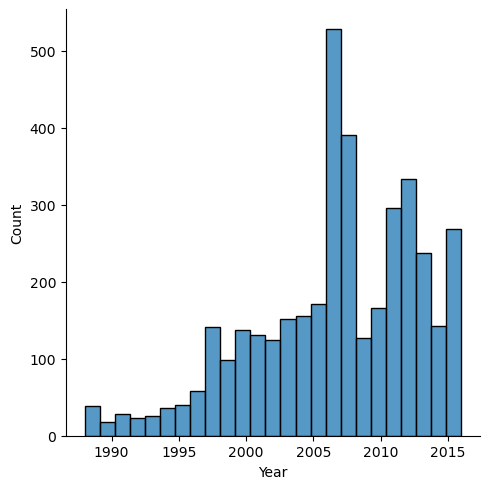

In [704]:
sns.displot(data_4['Year'])

In [705]:
data_cleaned = data_4.reset_index(drop=True)

In [706]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3863,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3864,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3865,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3866,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


In [707]:
data_cleaned.describe()

,Price,Mileage,EngineV,Year
count,3868.000000,3868.000000,3868.000000,3868.000000
mean,18198.929708,160.542399,2.451487,2006.710186
std,19085.415722,95.620925,0.951474,6.103116
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,91.000000,1.800000,2003.000000
50%,11700.000000,157.000000,2.200000,2008.000000
75%,21700.000000,225.000000,3.000000,2012.000000
max,129222.000000,435.000000,6.500000,2016.000000


### ols assumptions

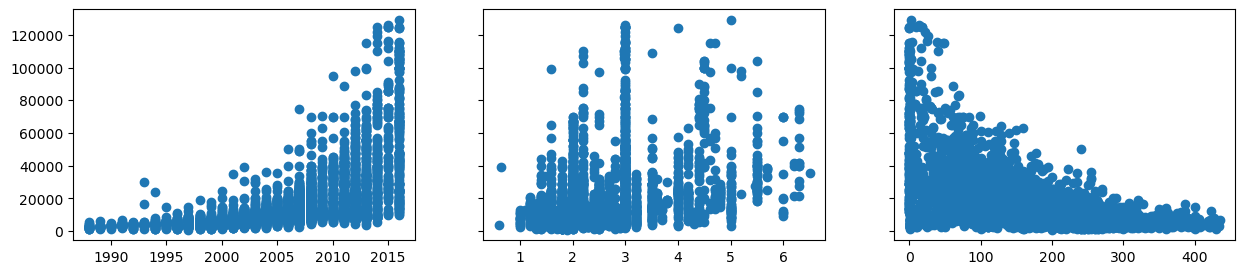

In [709]:
f,(ax1,ax2,ax3)= plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])

In [710]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price

In [711]:
data_cleaned=data_cleaned.drop(['Price'],axis=1)
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3863,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3864,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3865,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3866,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


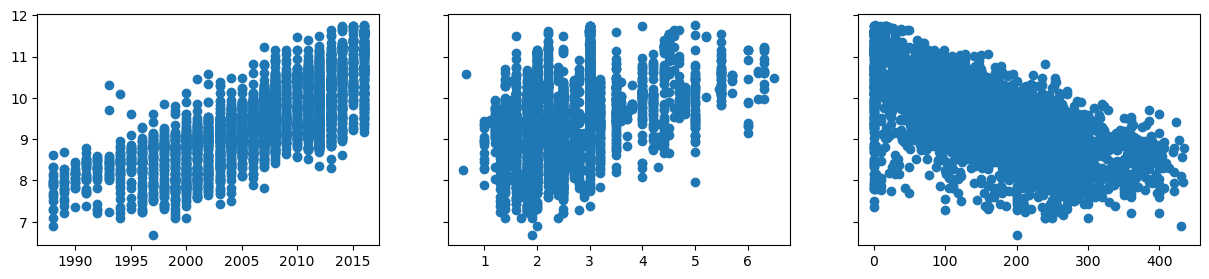

In [712]:
f,(ax1,ax2,ax3)= plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])

In [713]:


# Calculate VIF using only the numeric columns
vif = pd.DataFrame()
variables= data_cleaned[['Mileage','Year','EngineV']]
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

print(vif)

         VIF
0   3.792300
1  10.332226
2   7.638286


In [714]:
data_no_multicollinearity=data_cleaned.drop(['Year'],axis=1)

In [715]:
data_no_multicollinearity

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3863,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3864,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3865,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3866,BMW,sedan,1,3.5,Petrol,yes,8.779557


In [716]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity,drop_first=True)

In [717]:
data_with_dummies = data_with_dummies.astype(int)

In [718]:
data_with_dummies.columns.values
cols = ['log_price','Mileage', 'EngineV',  'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
data_preprocessed = data_with_dummies[cols]
data_preprocessed

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8,277,2,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8,427,2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9,358,5,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10,240,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9,120,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3863,9,163,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3864,9,35,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3865,11,9,3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3866,8,1,3,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [719]:
vif = pd.DataFrame()
variables = data_preprocessed.columns
vif["VIF"] = [variance_inflation_factor(data_preprocessed.values, i) for i in range(data_preprocessed.shape[1])]

print(vif)

          VIF
0   36.176335
1    4.329508
2    9.177747
3    2.591761
4    3.062090
5    1.812062
6    2.282741
7    2.401556
8    3.308474
9    1.589610
10   1.608124
11   3.524514
12   1.828397
13   2.618511
14   1.693691
15   1.081151
16   2.471636
17  14.983924


In [720]:
data_preprocessed = data_preprocessed.drop(['Registration_yes'],axis=1)

In [721]:
y=data_preprocessed['log_price']

In [722]:
input=data_preprocessed.drop(['log_price'],axis=1)

In [723]:
input.shape

(3868, 16)

In [724]:
from sklearn.preprocessing import StandardScaler

In [725]:
scaler = StandardScaler()

In [726]:
scaler.fit(input)

StandardScaler()

In [727]:
inputs_scaled = scaler.transform(input)

In [728]:
from sklearn.model_selection import train_test_split

In [729]:
x_train,x_test,y_train,y_test = train_test_split(inputs_scaled[:len(y)],y,test_size=0.3)

In [730]:
y_train.shape

(2707,)

In [731]:
from sklearn.linear_model import LinearRegression

In [732]:
reg = LinearRegression()

In [733]:
reg.fit(x_train,y_train)

LinearRegression()

In [804]:
y_hat = reg.predict(x_train)

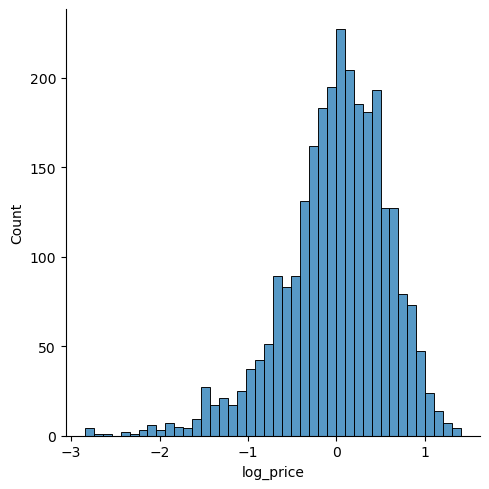

In [806]:
sns.displot(y_train-y_hat)

In [808]:
reg.score(x_test,y_test)

0.5807385064533677

In [810]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_train, y_hat)
mae


0.4532908035975547

In [812]:
reg_summary = pd.DataFrame(input.columns.values,columns=['Features'])
reg_summary['weights'] = reg.coef_
reg_summary

,Features,weights
0,Mileage,-0.528078
1,EngineV,0.260262
2,Brand_BMW,0.015613
3,Brand_Mercedes-Benz,0.022214
4,Brand_Mitsubishi,-0.127700
5,Brand_Renault,-0.137750
6,Brand_Toyota,-0.013291
7,Brand_Volkswagen,-0.039621
8,Body_hatch,-0.147802
9,Body_other,-0.086277
